# Tomography a Bell state
In this notebook we perform *t*QST of a Bell state, and compare it with the complete and overcomplete tomography. We use the experimental data reported in [this paper](http://research.physics.illinois.edu/QI/Photonics/tomography-files/tomo_chapter_2004.pdf), page 30, Figure 7b.  
We start by importing the necessary dependencies.

In [1]:
from tqst_class import *

We now define the Bell state of interest, in this case:
$$ \lvert \phi^- \rangle = \frac{1}{\sqrt{2}} \left( \lvert HH \rangle - \lvert VV \rangle \right), $$
and plot it.

/Users/diegomaragnano/Desktop/tQST-main/density_matrix_tool.py:325: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_zticklabels(z_lbls)


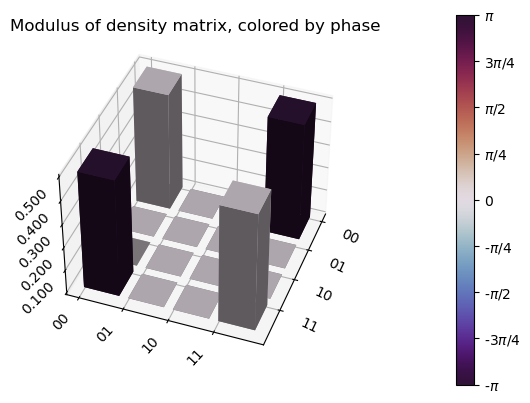

In [2]:
true_rho = np.zeros((4,4), dtype=complex)
true_rho[0,0] += 0.5
true_rho[3,3] += 0.5
true_rho[0,3] -= 0.5
true_rho[3,0] -= 0.5
dmt.plot_density_matrix_3D(true_rho)

## Overcomplete tomography
We start performing the overcomplete tomography of the state. Since it is a 2-qubit state, this method requires $6^2 = 36$ measurements, namely all those reported in the reference paper.  
We use the `tQST` class, and provide the measured projectors and counts via the `read_tomo_dictionary()` method.

Number of qubits set to 2.
Diagonal counts are now set.
The threshold is now set to 0.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 1, 'r')   |    |HD>   |
|  (0, 1, 'i')   |    |HR>   |
|  (0, 2, 'r')   |    |DH>   |
|  (0, 2, 'i')   |    |RH>   |
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
|  (1, 2, 'r')   |    |RR>   |
|  (1, 2, 'i')   |    |RD>   |
|  (1, 3, 'r')   |    |DV>   |
|  (1, 3, 'i')   |    |RV>   |
|  (2, 3, 'r')   |    |VD>   |
|  (2, 3, 'i')   |    |VR>   |
+----------------+-----------+
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


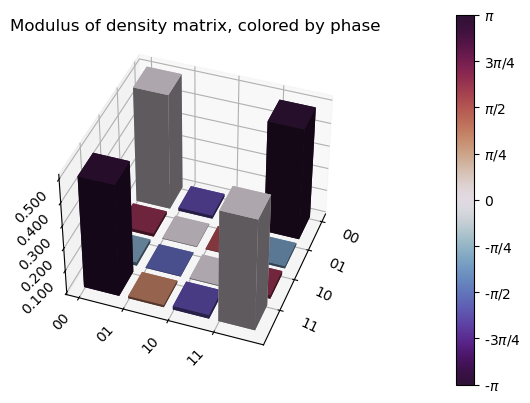

Fidelity with true state: 0.993397833743779


In [3]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()

diagonal = np.array([40230, 150, 220, 39094])
N = np.sum(diagonal)
diagonal = diagonal / N
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = 0
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()

# tdict.setdefault('HH', 40230)
# tdict.setdefault('HV', 150)
# tdict.setdefault('VH', 220)
# tdict.setdefault('VV', 39094)
tdict.setdefault('HD', 19970/N)
tdict.setdefault('HA', 20533/N)
tdict.setdefault('VD', 18542/N)
tdict.setdefault('VA', 20050/N)
tdict.setdefault('HR', 21988/N)
tdict.setdefault('HL', 18910/N)
tdict.setdefault('VR', 18003/N)
tdict.setdefault('VL', 21054/N)
tdict.setdefault('DH', 20556/N)
tdict.setdefault('DV', 19706/N)
tdict.setdefault('AH', 20010/N)
tdict.setdefault('AV', 18629/N)
tdict.setdefault('DD', 333/N)
tdict.setdefault('DA', 39918/N)
tdict.setdefault('AD', 38011/N)
tdict.setdefault('AA', 440/N)
tdict.setdefault('DR', 20475/N)
tdict.setdefault('DL', 19975/N)
tdict.setdefault('AR', 18931/N)
tdict.setdefault('AL', 19544/N)
tdict.setdefault('RH', 19900/N)
tdict.setdefault('RV', 19649/N)
tdict.setdefault('LH', 20761/N)
tdict.setdefault('LV', 19330/N)
tdict.setdefault('RD', 17423/N)
tdict.setdefault('RA', 21755/N)
tdict.setdefault('LD', 21207/N)
tdict.setdefault('LA', 18804/N)
tdict.setdefault('RR', 38717/N)
tdict.setdefault('RL', 401/N)
tdict.setdefault('LR', 483/N)
tdict.setdefault('LL', 39382/N)

projs, counts = tomo.read_tomo_dictionary(tdict)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)
print('Fidelity with true state:', dmt.fidelity(rho_rec, true_rho))

The usual output of our method tells you to measure 16 projectors. This is because we set the threshold to 0, and tQST never requires an overcomplete set, but at most a complete set. However, you can provide all the 36 measurements as well.  
The results of overcomplete tomography is very good, but it required performing a large number of measurements.  

## Full tomography
We now move to complete tomography, which requires $4^2 = 16$ measurements. We proceed as in the previous case, and the measurements are chosen with our procedure.

Number of qubits set to 2.
Diagonal counts are now set.
The threshold is now set to 0.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 1, 'r')   |    |HD>   |
|  (0, 1, 'i')   |    |HR>   |
|  (0, 2, 'r')   |    |DH>   |
|  (0, 2, 'i')   |    |RH>   |
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
|  (1, 2, 'r')   |    |RR>   |
|  (1, 2, 'i')   |    |RD>   |
|  (1, 3, 'r')   |    |DV>   |
|  (1, 3, 'i')   |    |RV>   |
|  (2, 3, 'r')   |    |VD>   |
|  (2, 3, 'i')   |    |VR>   |
+----------------+-----------+
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


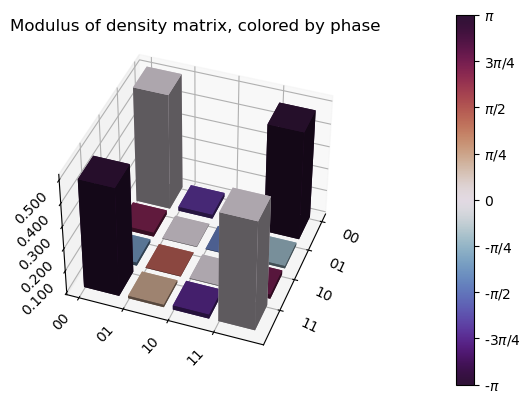

Fidelity with true state: 0.989095825561037


In [4]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()

diagonal = np.array([40230, 150, 220, 39094])
N = np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = 0
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()
# tdict.setdefault('HH', 40230)
# tdict.setdefault('HV', 150)
# tdict.setdefault('VH', 220)
# tdict.setdefault('VV', 39094)
tdict.setdefault('HD', 19970/N)
tdict.setdefault('HR', 21988/N)
tdict.setdefault('DH', 20556/N)
tdict.setdefault('RH', 19900/N)
tdict.setdefault('DD', 333/N)
tdict.setdefault('DR', 20475/N)
tdict.setdefault('RR', 38717/N)
tdict.setdefault('RD', 17423/N)
tdict.setdefault('DV', 19706/N)
tdict.setdefault('RV', 19649/N)
tdict.setdefault('VD', 18542/N)
tdict.setdefault('VR', 18003/N)

projs, counts = tomo.read_tomo_dictionary(tdict)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)
print('Fidelity with true state:', dmt.fidelity(rho_rec, true_rho))

The results are again very good, but slightly worse than the overcomplete case (fidelity goes from 99.3% to 98.9%).

## *t*QST
We finally test *t*QST for this state. As you will see, we set the threshold to 0.2, and the number of measurements to perform is just 6, less than a half of the complete case.

Number of qubits set to 2.
Diagonal counts are now set.
The threshold is now set to 0.1663801540893919.
These are the projectors you have to measure, given the provided diagonal and threshold.
+----------------+-----------+
| Matrix element | Projector |
+----------------+-----------+
|  (0, 3, 'r')   |    |DD>   |
|  (0, 3, 'i')   |    |DR>   |
+----------------+-----------+
The model for density matrix reconstruction is now set.
Tomography of [2, 2] using Triangular model with 16 variables
Defaulting to L-BFGS-B method with options {'gtol': 0.0001, 'maxiter': 1000}
The projectors and the corresponding counts are set. Ready to perform QST.


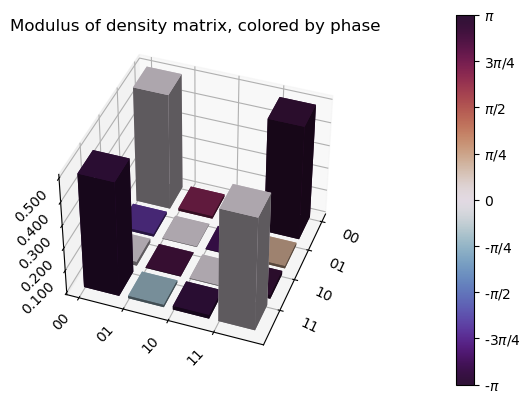

Fidelity with true state: 0.9944133615806954


In [5]:
tomo = tQST(2)
nq = tomo.get_num_of_qubits()

diagonal = np.array([40230, 150, 220, 39094])
N = np.sum(diagonal)
tomo.set_diagonal_counts(diagonal)
tdict = tomo.get_diagonal_counts()

threshold = dmt.gini_index(diagonal)
tomo.set_threshold(threshold)

proj_to_meas = tomo.get_projectors_to_measure()
# tdict.setdefault('HH', 40230)
# tdict.setdefault('HV', 150)
# tdict.setdefault('VH', 220)
# tdict.setdefault('VV', 39094)
tdict.setdefault('DD', 333/N)
tdict.setdefault('RR', 38717/N)

projs, counts = tomo.read_tomo_dictionary(tdict)

tomo.set_density_matrix_model(model_triangular)

rho_rec = tomo.get_density_matrix(projs, counts)
dmt.plot_density_matrix_3D(rho_rec)
print('Fidelity with true state:', dmt.fidelity(rho_rec, true_rho))

Even with a reduced number of measurements, *t*QST can reconstruct the state with high fidelity, even higher than the overcomplete case (99.4% with respect to 99.3%).